# Статистический вывод

### Зачем мы это делаем
По сути, конкретно здесь мы не делаем статистический вывод как таковой. Вместо этого мы решаем другую практическую задачу - обнаружение аномалий во временном ряду. Эта задача часто встречается на практике и чаще всего реализуется в режиме онлайн, но можно делать и постфактум.

Фактически мы здесь используем инструментарий доверительных интервалов, чтобы определить критерий "аномальности". Учитывая при этом тот факт, что мы работаем с временным рядом - чередой значений, меняющихся во времени и зависящих друг от друга.

Естественно, есть и другие способы детекции аномалий - просто этот самый простой и наиболее тематический.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [2]:
mu = 100
sigma = 10

In [3]:
population = np.random.normal(mu, sigma, 10000).round(2)

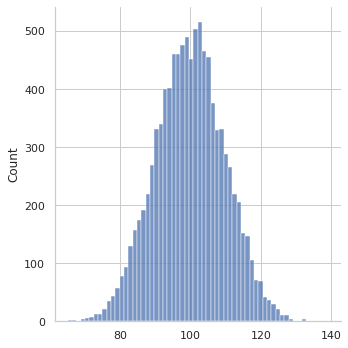

In [4]:
sns.displot(population)

In [5]:
population.mean()

99.893711

In [6]:
population.std()

9.83758975148278

In [7]:
sample_size = 30

In [8]:
sample = np.random.choice(population, sample_size, False)

# False / True - делать ли выборку с повторениями

In [9]:
sample.mean()

102.48

In [10]:
sample_means = []

In [11]:
n = 1000

In [12]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())


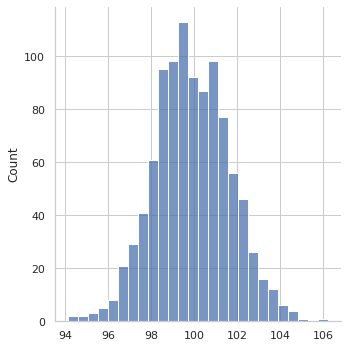

In [13]:
sns.displot(sample_means)

In [14]:
np.mean(sample_means)

99.89898466666668

In [15]:
# se = sigma / sqrt(n) - стандартная ошибка распределения
# Правило 1.96 сигм - 95% значений в этом диапазоне

In [16]:
se = population.std() / (sample_size) ** 0.5

In [17]:
se

1.796089939456253

In [18]:
np.std(sample_means)

1.7491566916623313

In [19]:
population.mean() + 1.96 * se 
# доверительный интервал

103.41404728133425

In [20]:
population.mean() - 1.96 * se

96.37337471866574

In [21]:
sample_real = np.random.choice(population, sample_size, False)

In [22]:
sample_real.mean()

103.56099999999998

In [23]:
# se = sigma / sqrt(n) - стандартная ошибка распределения
# но в реальности мы не знаем сигму ГС, поэтому используем выборочное std

In [24]:
se = sample_real.std() / sample_size ** 0.5
se

1.418715800370963

In [25]:
sample_real.mean() + 1.96 * se

106.34168296872707

In [26]:
sample_real.mean() - 1.96 * se

100.78031703127289

Как считать доверительный интервал в Python:

In [27]:
import scipy.stats as st
import statsmodels.stats.api as sms

a = range(100)

# первый способ
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

# второй способ
sms.DescrStatsW(a).tconfint_mean()

(43.74349058328968, 55.25650941671032)

В среднем слушатели курса по введению в статистику набирают 115 баллов, но в 2015 году средний балл случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. 

Рассчитайте p-уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

In [28]:
n = 144
x = 115
m = 118
sd = 9

In [29]:
z = (x - m) / sd * (n ** 0.5)
z

-4.0

# Проект

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. 
Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. 

Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

- timestamp – дата и время (точность до часа)
- cnt – количество аренд велосипедов за этот час
- t1 – температура, в С
- t2 – температура "ощущается как", в С 
- hum – влажность (%)
- wind_speed – скорость ветра, км/ч
- weather_code – погодные условия
    - 1 – ясно (SKC)
    - 2 – преимущественно ясно / встречаются отдельные облака (SCT)
    - 3 – облачно / значительные облака (BKN)
    - 4 – пасмурно (OVC)
    - 7 – небольшой дождь Rain/ light Rain shower/ Light rain 
    - 10 – дождь с грозой
    - 26 – снегопад 
    - 94 – ледяной туман (да, такое бывает!)
- isholiday – является ли день праздником (1 – праздник, 0 – нет)
- isweekend –  является ли день выходным (1 – выходной, 0 – нет)
- season - метеорологический сезон (0 – весна, 1 – лето,2 – осень, 3 – зима)


Загрузите данные, проверьте число наблюдений и столбцов. Убедитесь, что типы данных были интерпретированы pandas правильно. При необходимости – приведите переменные к нужным типам. 

Есть ли в данных пропущенные значения?

In [30]:
london = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/statistics/london.csv', parse_dates = ['timestamp'])

In [31]:
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [32]:
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [33]:
london[['weather_code', 'is_holiday', 'is_weekend', 'season']] = london[['weather_code', 'is_holiday', 'is_weekend', 'season']].astype(int)

In [34]:
london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [35]:
london.shape

(17414, 10)

In [36]:
london.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

- по оси x – дата (timestamp)
- по оси y – число поездок (cnt)


In [37]:
london['date'] = london['timestamp'].dt.date

In [38]:
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04


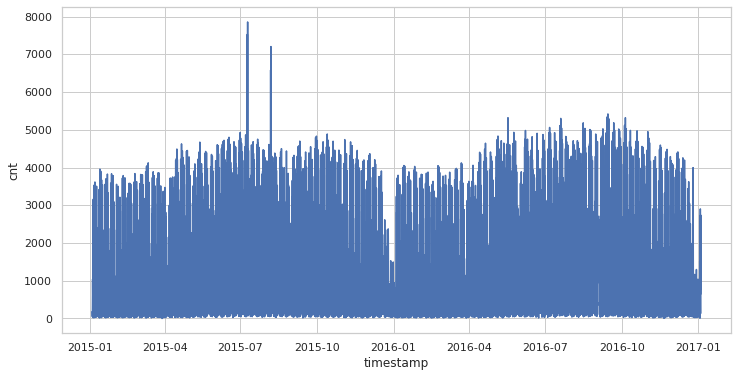

In [41]:
sns.lineplot(x="timestamp", y="cnt", data=london)

In [39]:
# преобразуем данные
london_date = london.groupby('date', as_index = False) \
    .agg({'cnt' : 'sum'}) \
    .sort_values('date')

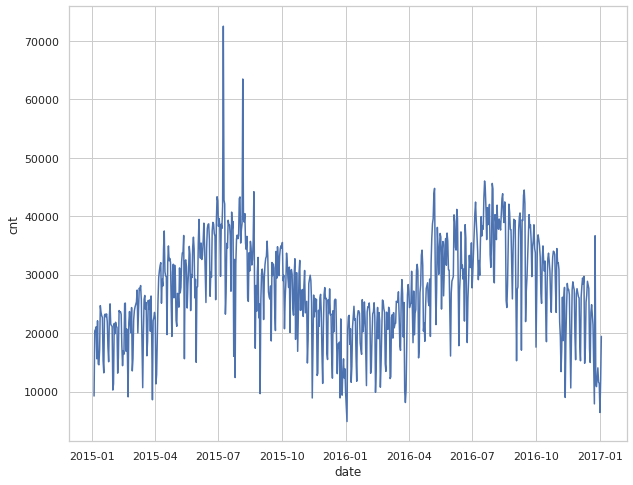

In [40]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(y='cnt', x='date', data=london_date)


Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). 

Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

    data.resample(rule='D').column_name.sum() #способ 1
    data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему

Давайте проверим, что же могло произойти в те дни - и насколько эти изменения для нас неожиданны. Для этого мы попробуем построить доверительный интервал вокруг данных - всё, что выпадает за его пределы, будет считаться аномалией, и на отдельные из них мы потом и посмотрим.

Мы сейчас работаем с временным рядом - последовательностью значений, меняющейся во времени. 
Мы не можем просто так посчитать доверительный интервал для всего: так мы можем упустить важные характеристики данных! 
Например, сезонные колебания. 

Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее. 
Для этого разделим дальнейшие действия на несколько этапов:

- сначала посчитаем скользящее среднее, чтобы сгладить ряд
- далее – разницу между наблюдаемыми и сглаженными значениями
- определим верхние и нижние границы 99% доверительного интервала 
- найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. 
В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [54]:

london_df = london.set_index('timestamp')['cnt'].resample('D').sum().to_frame().reset_index()

In [55]:
london_df['cnt_roll'] = london_df.cnt.rolling(3).mean()

In [56]:
london_df

,timestamp,cnt,cnt_roll
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


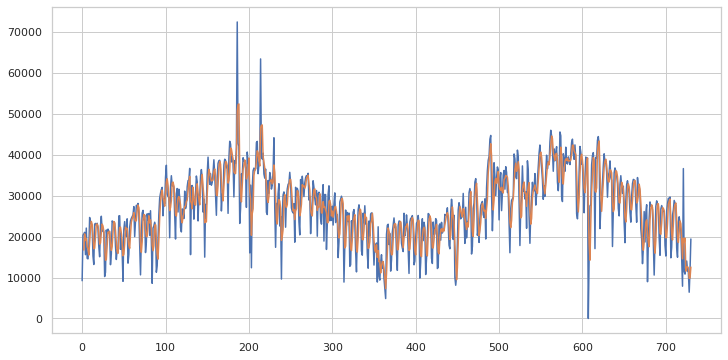

In [62]:
#нарисуем в одних координатах
london_df.cnt.plot()
london_df.cnt_roll.plot() 

In [63]:
london_df.query('timestamp == "2015-07-09"')

,timestamp,cnt,cnt_roll
186,2015-07-09,72504,50705.0


In [64]:
std = np.std(london_df.cnt - london_df.cnt_roll)

In [65]:
std.round(2)

4558.59

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

- upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
- lower_bound – нижняя граница; вычитаем 2.576∗std

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.



In [66]:
london_df['upper_bound'] = london_df.cnt_roll + 2.576 * std
london_df['lower_bound'] = london_df.cnt_roll - 2.576 * std
london_df.tail()

,timestamp,cnt,cnt_roll,upper_bound,lower_bound
726,2016-12-30,11566,12682.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,21632.252521,-1853.585854
730,2017-01-03,19436,12560.000000,24302.919188,817.080812


И наконец – изучим аномально высокие значения! Выведите наблюдения, для которых наблюдаемые значения оказались больше 
верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [67]:
london_df.query('cnt > upper_bound')

,timestamp,cnt,cnt_roll,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479


Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого

In [68]:
london_df.query('cnt < lower_bound')

,timestamp,cnt,cnt_roll,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
